<table align="center" width=100%>
    <tr>
        <td width="5%">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=24px>
                    <b>Mobile Price Classification
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

# Importing required libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings
filterwarnings('ignore')
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.6f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image 
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings("ignore")

# Reading the csv file

In [2]:
df = pd.read_csv('mobiles.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.200000,0,1,0,7,0.600000,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.shape

(2000, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- >**All features are numerical variables( in which some are categorical variables which were already label encoded).**

In [8]:
df.price_range.value_counts(normalize=True)

3   0.250000
2   0.250000
1   0.250000
0   0.250000
Name: price_range, dtype: float64

In [9]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)

# EDA

**Distribution of the categorical variables**

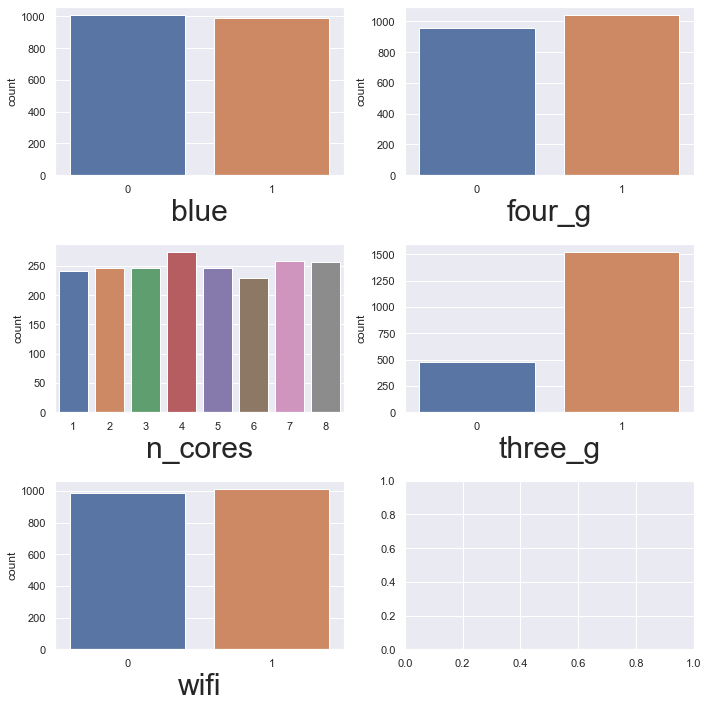

In [99]:
columns=df[['blue','four_g','n_cores','three_g','wifi']]
fig, ax = plt.subplots(3, 2, figsize=(10,10))
for variable, subplot in zip(columns, ax.flatten()):
    countplot = sns.countplot(x=df[variable], ax=subplot )
    countplot.set_xlabel(variable, fontsize = 30)
plt.tight_layout()   
plt.show()

<AxesSubplot:>

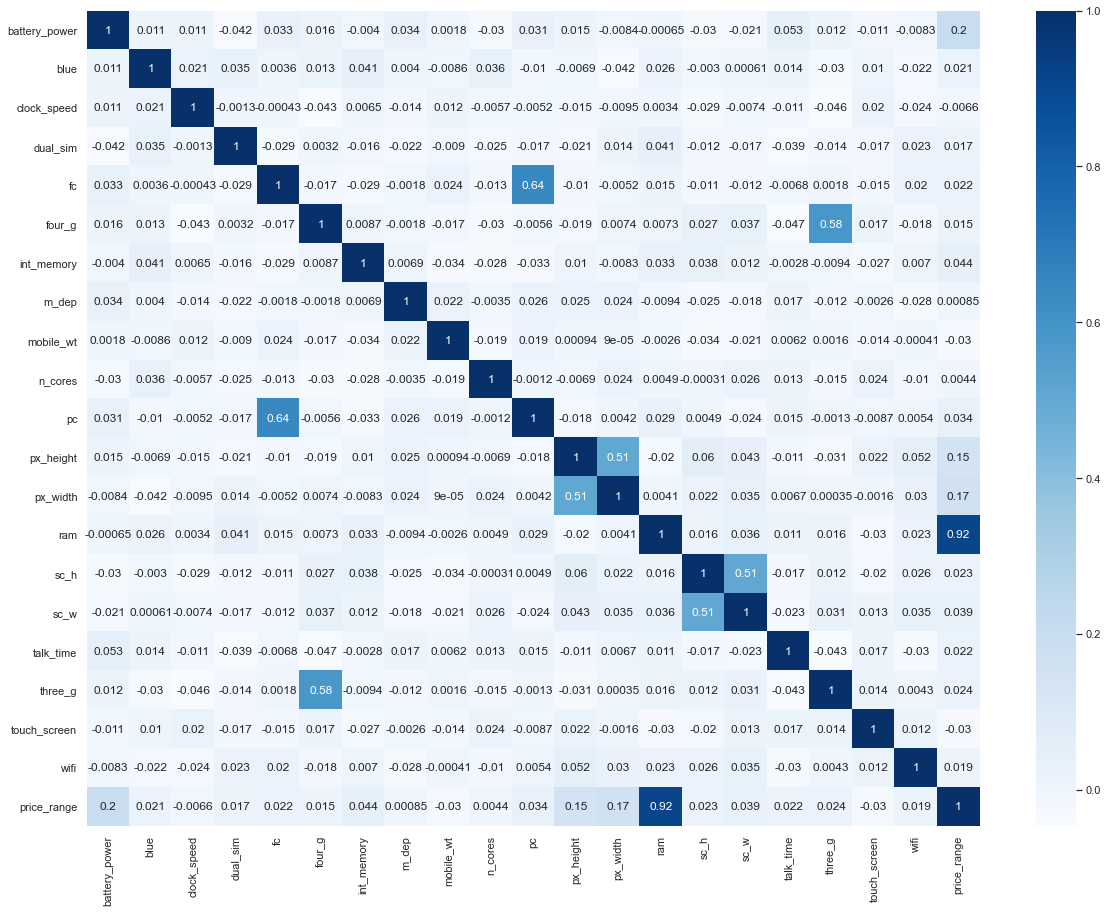

In [100]:
fig = plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

- >**Most of the regions are light blue in nature indicating that there is no much relation between the features and also no multicollinearity.**

In [101]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Checking for outliers

In [102]:
dfn=df.drop(['blue','dual_sim','four_g','three_g','touch_screen','wifi','price_range'],axis=1)

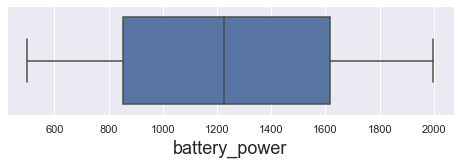

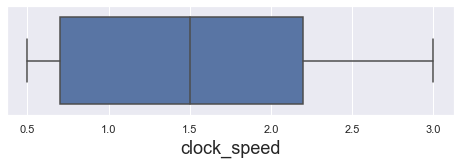

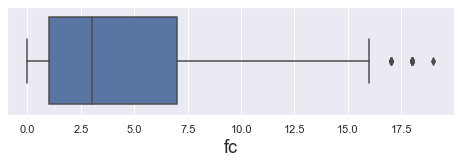

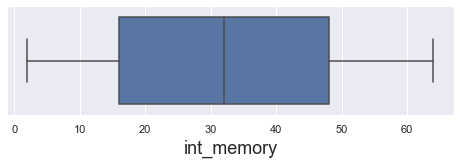

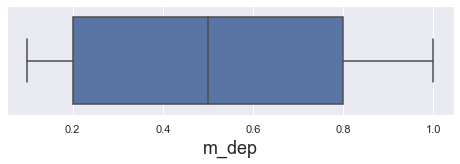

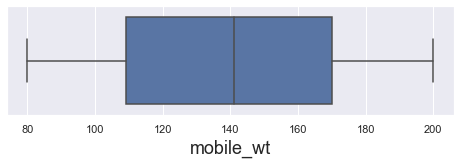

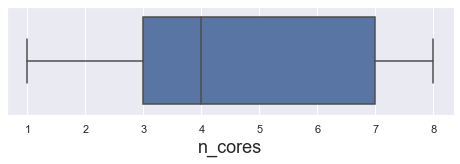

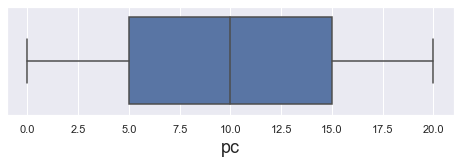

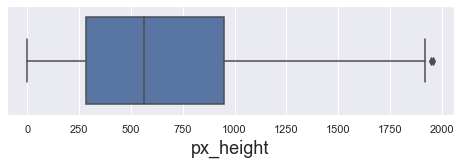

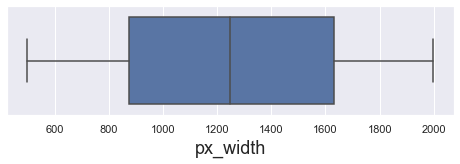

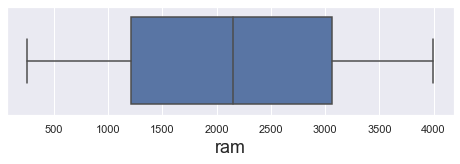

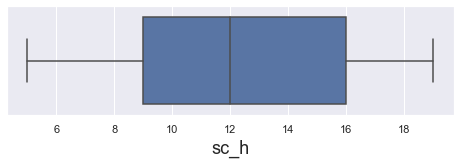

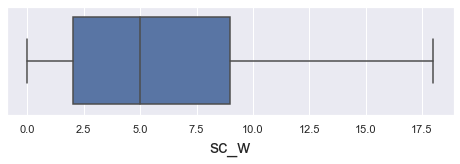

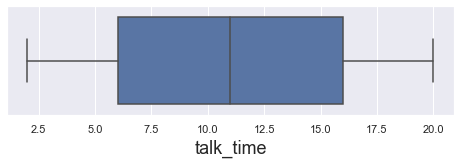

In [103]:
for column in enumerate(dfn):
    plt.figure(figsize=(8,2))
    sns.set_theme(style="darkgrid")
    sns.boxplot(x=column[1], data=  dfn)
    plt.xlabel(column[1],fontsize=18)
    plt.show()

In [104]:
df.shape

(2000, 21)

# Removing outliers using IQR method

In [105]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
df=df[~((df< (q1-1.5*IQR)) | (df> (q3+ 1.5*IQR)) ).any(axis=1)]
df.shape

(1506, 21)

In [106]:
df.reset_index(drop=True,inplace=True)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1021,1,0.500000,1,0,1,53,0.700000,136,3,6,905,1988,2631,17,3,7,1,1,0,2
1,563,1,0.500000,1,2,1,41,0.900000,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
2,615,1,2.500000,0,0,0,10,0.800000,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
3,1821,1,1.200000,0,13,1,44,0.600000,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
4,1859,0,0.500000,1,3,0,22,0.700000,164,1,7,1004,1654,1067,17,1,10,1,0,0,1


# Checking if the target variable is balanced

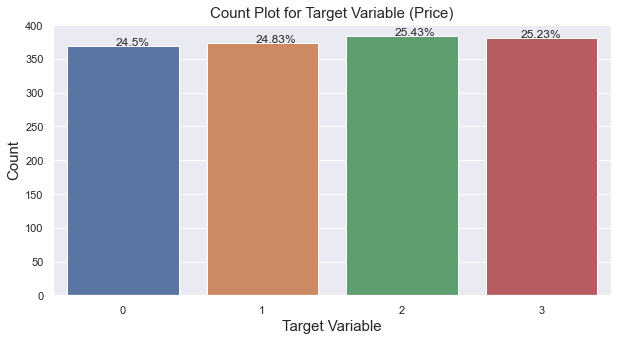

In [107]:
plt.rcParams['figure.figsize'] = [10,5]
df_target=df['price_range']
df_target.value_counts()
sns.countplot(x = df_target)
plt.text(x = -0.05, y = df_target.value_counts()[0] + 1, s = str(round((df_target.value_counts()[0])*100/len(df_target),2)) + '%')
plt.text(x = 0.95, y = df_target.value_counts()[1] +1, s = str(round((df_target.value_counts()[1])*100/len(df_target),2)) + '%')
plt.text(x = 1.95, y = df_target.value_counts()[2] +1, s = str(round((df_target.value_counts()[2])*100/len(df_target),2)) + '%')
plt.text(x = 2.85, y = df_target.value_counts()[3] +1, s = str(round((df_target.value_counts()[3])*100/len(df_target),2)) + '%')
plt.title('Count Plot for Target Variable (Price)', fontsize = 15)
plt.xlabel('Target Variable', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

- >**All the classes seem to be balanced from the above plot.**

# Removing insignificant features

In [108]:
df_feature=df.drop('price_range',axis=1)

In [109]:
for i in df_feature.columns:
    print(i,'=',df_feature[i].nunique())

battery_power = 943
blue = 2
clock_speed = 26
dual_sim = 2
fc = 17
four_g = 2
int_memory = 63
m_dep = 10
mobile_wt = 121
n_cores = 8
pc = 21
px_height = 954
px_width = 947
ram = 1236
sc_h = 15
sc_w = 19
talk_time = 19
three_g = 1
touch_screen = 2
wifi = 2


In [110]:
df_feature.drop('three_g',axis=1,inplace=True)

- >**From unique values of features we can see that three_g has only 1 unique value, hence it wont contribute much to further processes , hence we drop it.**

# Scaling the numerical features

In [111]:
from sklearn.preprocessing import StandardScaler

In [112]:
df_features = df_feature.drop(['blue','dual_sim','four_g','touch_screen','wifi'],axis=1)
ss=StandardScaler()
df_features_scaled=ss.fit_transform(df_features)
df_features_scaled=pd.DataFrame(df_features_scaled,columns=df_features.columns)

In [113]:
X=pd.concat([df_features_scaled,df_feature[['blue','dual_sim','touch_screen','wifi','four_g']]],axis=1)
X.reset_index(drop=True,inplace=True)
X.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,blue,dual_sim,touch_screen,wifi,four_g
0,-0.496650,-1.230115,-0.992446,1.155434,0.695039,-0.119621,-0.662592,-0.631469,0.625802,1.722560,0.456555,1.105218,-0.645011,-0.712037,1,1,1,0,1
1,-1.539913,-1.230115,-0.517887,0.496540,1.390078,0.136556,0.216196,-0.631469,1.448534,1.088277,0.430729,-0.319222,-0.871441,-0.343856,1,1,1,0,1
2,-1.421464,1.228157,-0.992446,-1.205602,1.042559,-0.261942,0.655590,-0.136247,1.340522,1.251511,0.583838,0.867812,0.487141,0.024325,1,0,0,0,0
3,1.325646,-0.369720,2.092189,0.661264,0.347520,0.022699,-1.101986,0.689125,1.322137,-0.087012,-0.668705,-1.031443,-0.871441,0.760688,1,0,1,0,1
4,1.412205,-1.230115,-0.280608,-0.546708,0.695039,0.677375,-1.541379,-0.466395,0.853317,0.943698,-0.985991,1.105218,-1.097872,-0.159765,0,1,0,0,0


- >**As blue,dual_sim,four_g,touch_screen,wifi are already encoded categorical features , we did not scale them.**

# Train Test Split

In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1054, 19)
y_train (1054,)
X_test (452, 19)
y_test (452,)


In [115]:
tuned_paramaters = [{'n_features_to_select':range(5,20)}]
rfe_model=RFE(estimator=LinearRegression())
rfe_grid = GridSearchCV(estimator = rfe_model, param_grid = tuned_paramaters, cv = 5)
rfe1 = rfe_grid.fit(X_train, y_train)
print('Best parameters for RFE: ', rfe1.best_params_, '\n')

Best parameters for RFE:  {'n_features_to_select': 7} 



In [116]:
linreg_rfe = LinearRegression()
RFE_model = RFE(estimator=linreg_rfe, n_features_to_select = 7)
RFE_model = RFE_model.fit(X_train, y_train)
feat_index = pd.Series(data = RFE_model.ranking_, index = X_train.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)


Index(['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram', 'blue',
       'dual_sim'],
      dtype='object')


# Defining the required reports and graphs.

In [117]:
def get_test_report(model):
    test_pred = model.predict(X_test)
    return(classification_report(y_test, test_pred))

In [118]:
def get_train_report(model):
    train_pred = model.predict(X_train)
    return(classification_report(y_train, train_pred))

In [119]:
def plot_confusion_matrix(model):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1','Predicted:2','Predicted:3'], index = ['Actual:0','Actual:1','Actual:2','Actual:3'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show()

# Logistic Regression

In [120]:
X=X[['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram', 'blue','dual_sim']]
X.head()

,battery_power,mobile_wt,px_height,px_width,ram,blue,dual_sim
0,-0.496650,-0.119621,0.625802,1.722560,0.456555,1,1
1,-1.539913,0.136556,1.448534,1.088277,0.430729,1,1
2,-1.421464,-0.261942,1.340522,1.251511,0.583838,1,0
3,1.325646,0.022699,1.322137,-0.087012,-0.668705,1,0
4,1.412205,0.677375,0.853317,0.943698,-0.985991,0,1


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1054, 7)
y_train (1054,)
X_test (452, 7)
y_test (452,)


In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [123]:
y_pred = lr.predict(X_test)
y_pred[:5]

array([0, 0, 1, 3, 2], dtype=int64)

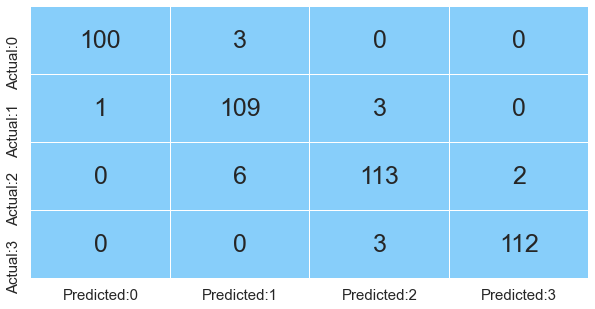

In [124]:
plot_confusion_matrix(lr)

In [125]:
train_report = get_train_report(lr)
print(train_report)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       266
           1       0.96      0.97      0.97       261
           2       0.97      0.95      0.96       262
           3       0.97      0.99      0.98       265

    accuracy                           0.97      1054
   macro avg       0.97      0.97      0.97      1054
weighted avg       0.97      0.97      0.97      1054



In [126]:
test_report = get_test_report(lr)
print(test_report)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       103
           1       0.92      0.96      0.94       113
           2       0.95      0.93      0.94       121
           3       0.98      0.97      0.98       115

    accuracy                           0.96       452
   macro avg       0.96      0.96      0.96       452
weighted avg       0.96      0.96      0.96       452



In [127]:
y_test.shape

(452,)

In [128]:
y_pred.shape

(452,)

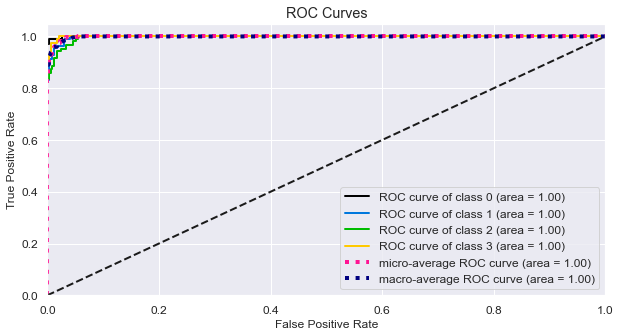

In [129]:
import scikitplot 
y_proba = lr.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test,y_proba)
plt.show()

- >**Accuracy of Logistic Regression is 96%.**

In [130]:
score_card = pd.DataFrame(columns=['Model_Name', 'Accuracy'])
score_card

,Model_Name,Accuracy


In [131]:
Logistic_Regression_model = pd.Series({
                     'Model_Name': "Logistic_Regression_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(Logistic_Regression_model, ignore_index=True)
score_card

,Model_Name,Accuracy
0,Logistic_Regression_model,0.960200


# K Nearest Neighbors (KNN)

In [ ]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev']}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy')
knn_grid.fit(X_train, y_train)
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

In [132]:
#knn_classification = KNeighborsClassifier(metric= knn_grid.best_params_.get('metric'),
                                         # n_neighbors = knn_grid.best_params_.get('n_neighbors'))
knn_classification = KNeighborsClassifier(metric= 'manhattan',
n_neighbors = 23)
knn_model = knn_classification.fit(X_train, y_train)

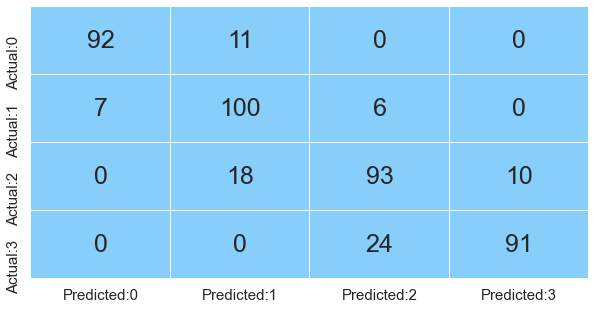

In [133]:
plot_confusion_matrix(knn_model)

In [134]:
train_report = get_train_report(knn_model)
print(train_report)

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       266
           1       0.83      0.87      0.85       261
           2       0.82      0.86      0.84       262
           3       0.96      0.89      0.92       265

    accuracy                           0.89      1054
   macro avg       0.89      0.89      0.89      1054
weighted avg       0.89      0.89      0.89      1054



In [135]:
test_report = get_test_report(knn_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       103
           1       0.78      0.88      0.83       113
           2       0.76      0.77      0.76       121
           3       0.90      0.79      0.84       115

    accuracy                           0.83       452
   macro avg       0.84      0.83      0.84       452
weighted avg       0.84      0.83      0.83       452



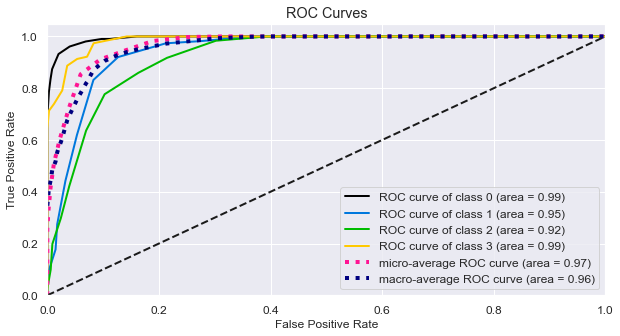

In [137]:
import scikitplot 
y_proba = knn_model.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test,y_proba)
plt.show()

- >**Accuracy of KNN is 83%.**

In [ ]:
y_pred = knn_model.predict(X_test)
K_nearest_neighbours_model = pd.Series({
                     'Model_Name': "knn_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(K_nearest_neighbours_model, ignore_index=True)
score_card

# Gaussian Naive Bayes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_feature[['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram', 'blue','dual_sim']], df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

In [ ]:
gnb = GaussianNB()
gnb_model = gnb.fit(X_train, y_train)

In [ ]:
plot_confusion_matrix(gnb_model)

In [ ]:
train_report = get_train_report(gnb_model)
print(train_report)

In [ ]:
test_report = get_test_report(gnb_model)
print(test_report)

In [ ]:
import scikitplot 
y_proba = gnb.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test,y_proba)
plt.show()

In [54]:
y_pred = gnb_model.predict(X_test)
Gaussian_model = pd.Series({
                     'Model_Name': "Gaussian_Naive_Bayes_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                })
score_card = score_card.append(Gaussian_model, ignore_index=True)

- >**Accuracy of Gaussian Model is 75%.**

# Decision Tree

In [55]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
                     'max_depth': range(2, 10),
                     'max_features': ["sqrt", "log2"],
                     'min_samples_split': range(2,10),
                     'min_samples_leaf': range(20,70,5),
                     'max_leaf_nodes': range(1, 10)}]
decision_tree_classification = DecisionTreeClassifier(random_state = 10)
tree_grid = GridSearchCV(estimator = decision_tree_classification, param_grid = tuned_paramaters, cv = 5)
tree_grid_model = tree_grid.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 9, 'min_samples_leaf': 25, 'min_samples_split': 2} 



In [56]:
decision_tree_classification = DecisionTreeClassifier(max_depth=5,
                                                         criterion = 'entropy',
                                                         random_state = 10,
                                                         min_samples_split=2,
                                                        min_samples_leaf=9,
                                                        max_leaf_nodes= 8,
                                                        max_features='sqrt')
decision_tree = decision_tree_classification.fit(X_train, y_train)

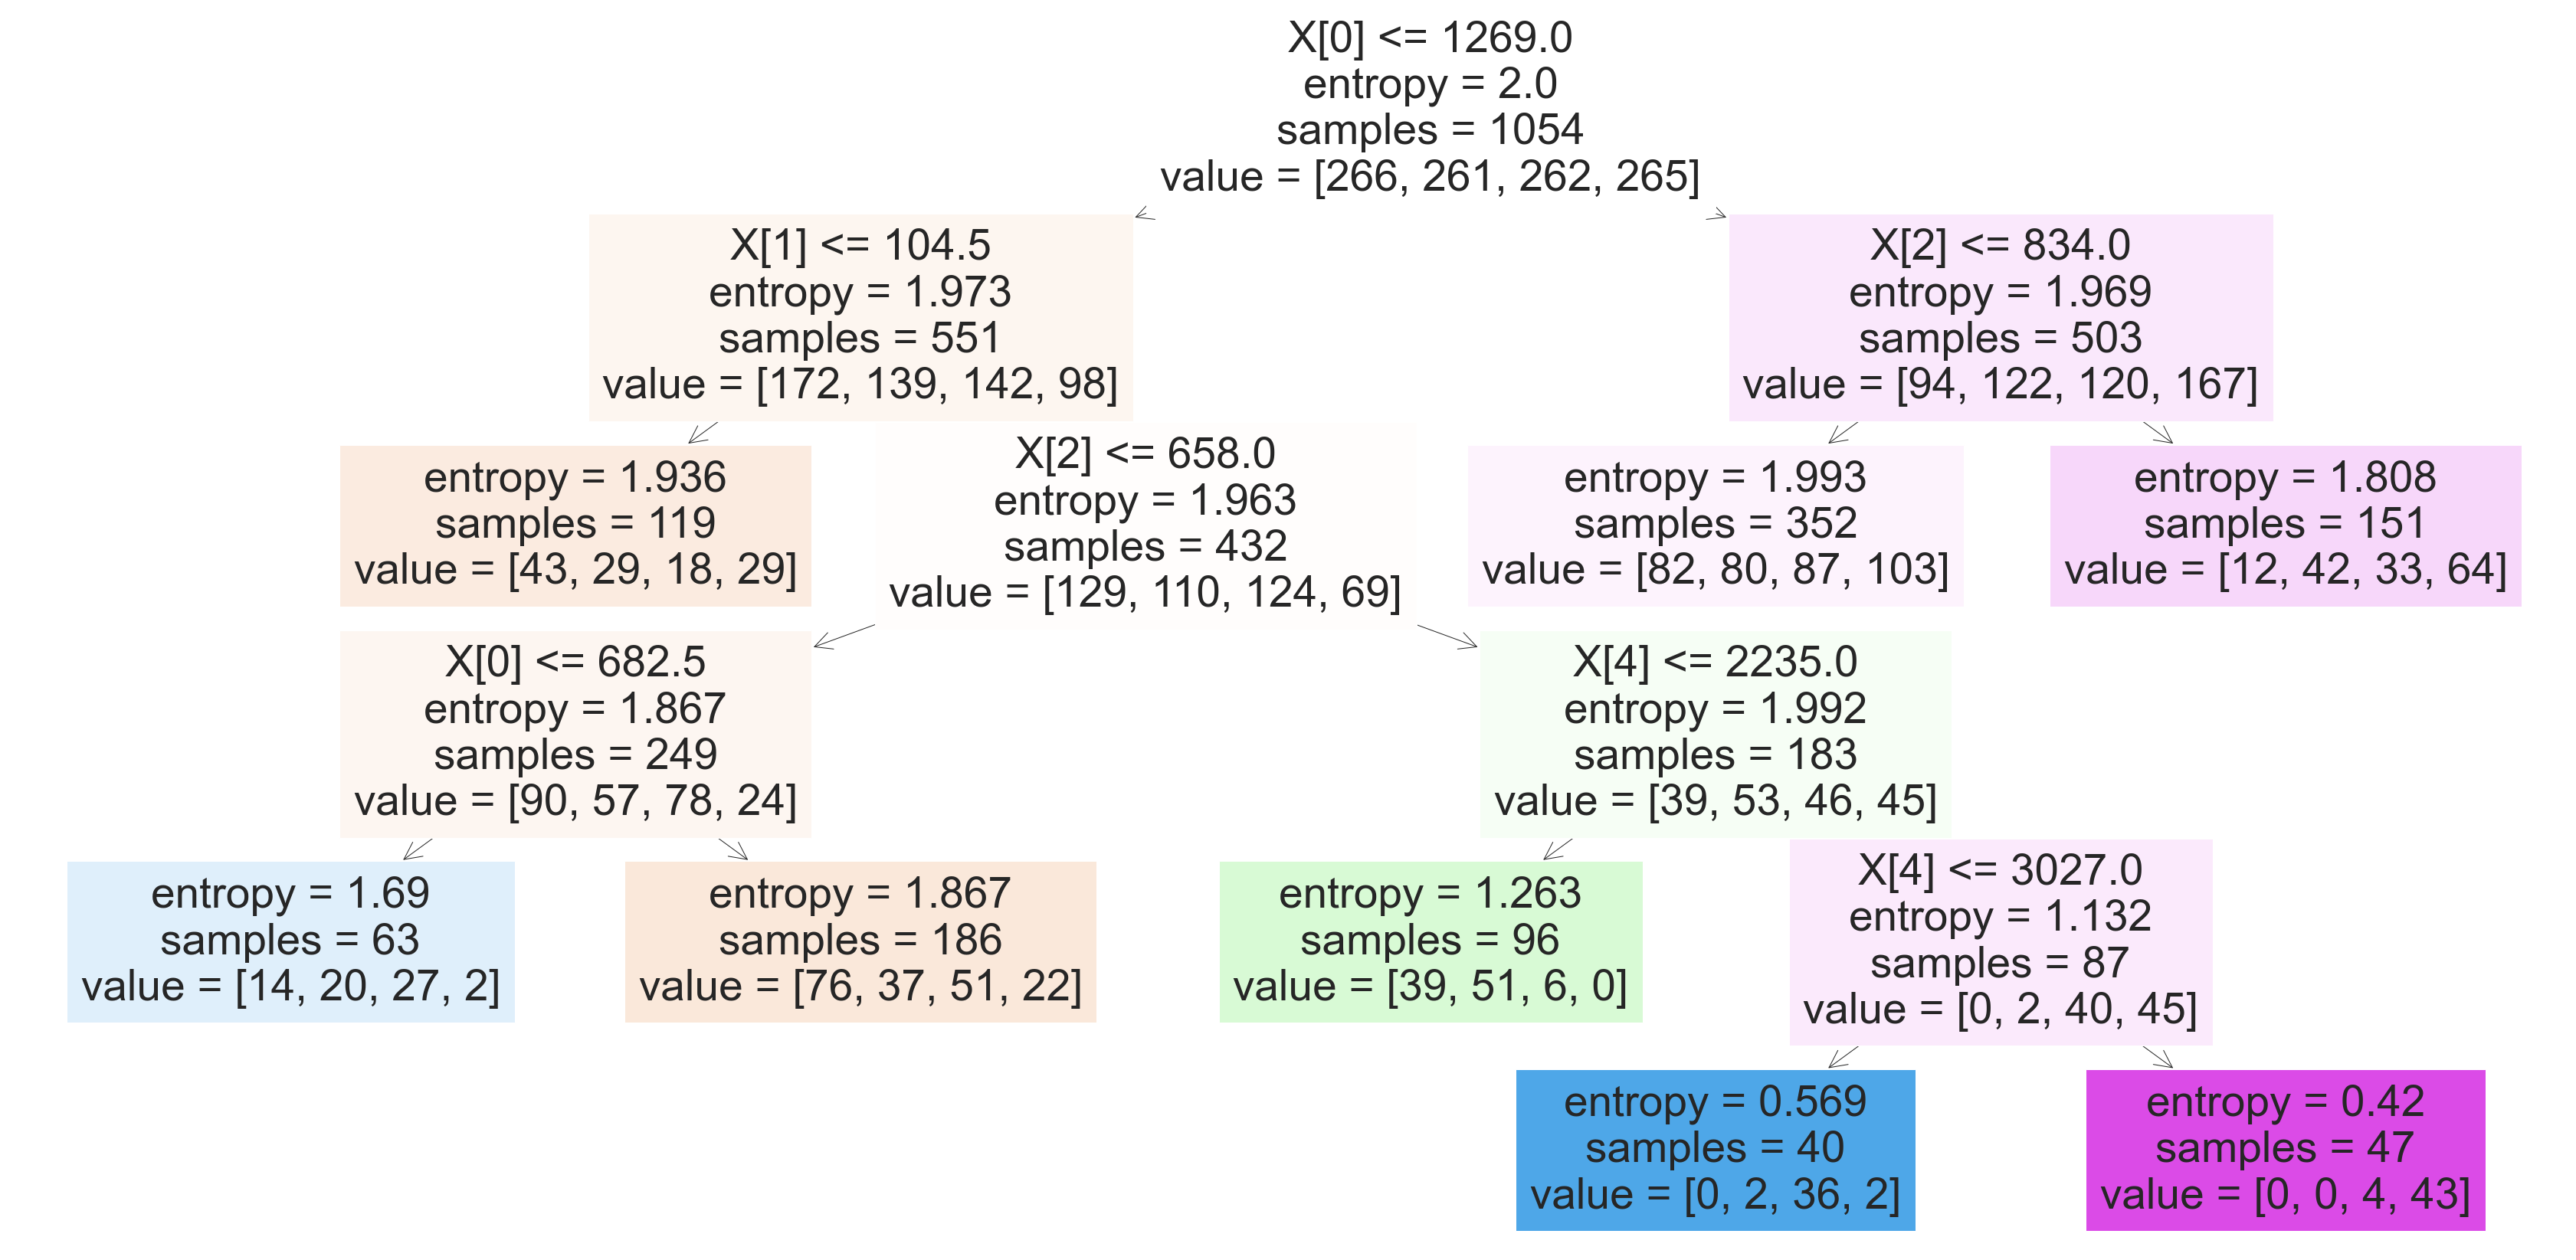

In [57]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(decision_tree, filled=True);

In [58]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.39      0.45      0.42       266
           1       0.53      0.20      0.29       261
           2       0.61      0.24      0.35       262
           3       0.38      0.79      0.52       265

    accuracy                           0.42      1054
   macro avg       0.48      0.42      0.39      1054
weighted avg       0.48      0.42      0.39      1054



In [59]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.30      0.38      0.33       103
           1       0.40      0.15      0.22       113
           2       0.48      0.21      0.29       121
           3       0.38      0.76      0.51       115

    accuracy                           0.37       452
   macro avg       0.39      0.37      0.34       452
weighted avg       0.39      0.37      0.34       452



## Decision tree with RandomizedSearchCV

In [60]:
dtm = DecisionTreeClassifier(random_state = 10)
param_dist={'max_features': ["sqrt", "log2"],
           'max_depth':sp_randint(2,10),
           'min_samples_leaf':sp_randint(1,50),
            'min_samples_split': sp_randint(2,10),
           'criterion':['entropy','gini']
          }

tree_grid_model=RandomizedSearchCV(dtm,param_distributions=param_dist,scoring='accuracy',cv=5,n_iter=3,random_state=4)
tree_grid_model.fit(X_train, y_train)
print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

Best parameters for decision tree classifier:  {'criterion': 'entropy', 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 4} 



In [61]:
decision_tree_classification = DecisionTreeClassifier(max_depth=tree_grid_model.best_params_.get('max_depth'),
                                                       criterion = tree_grid_model.best_params_.get('criterion'),
                                                       random_state = tree_grid_model.best_params_.get('random_state'),
                                                       min_samples_split=tree_grid_model.best_params_.get('min_samples_split'),
                                                       min_samples_leaf=tree_grid_model.best_params_.get('min_samples_leaf'),
                                                       max_features=tree_grid_model.best_params_.get('max_features'))
    
# decision_tree_classification = DecisionTreeClassifier(max_depth=5,
#                                                        criterion = 'entropy',
#                                                        random_state = 10,
#                                                        min_samples_split=2,
#                                                        min_samples_leaf=9,
#                                                        max_leaf_nodes= 8,
#                                                        max_features='sqrt')
decision_tree = decision_tree_classification.fit(X_train, y_train)

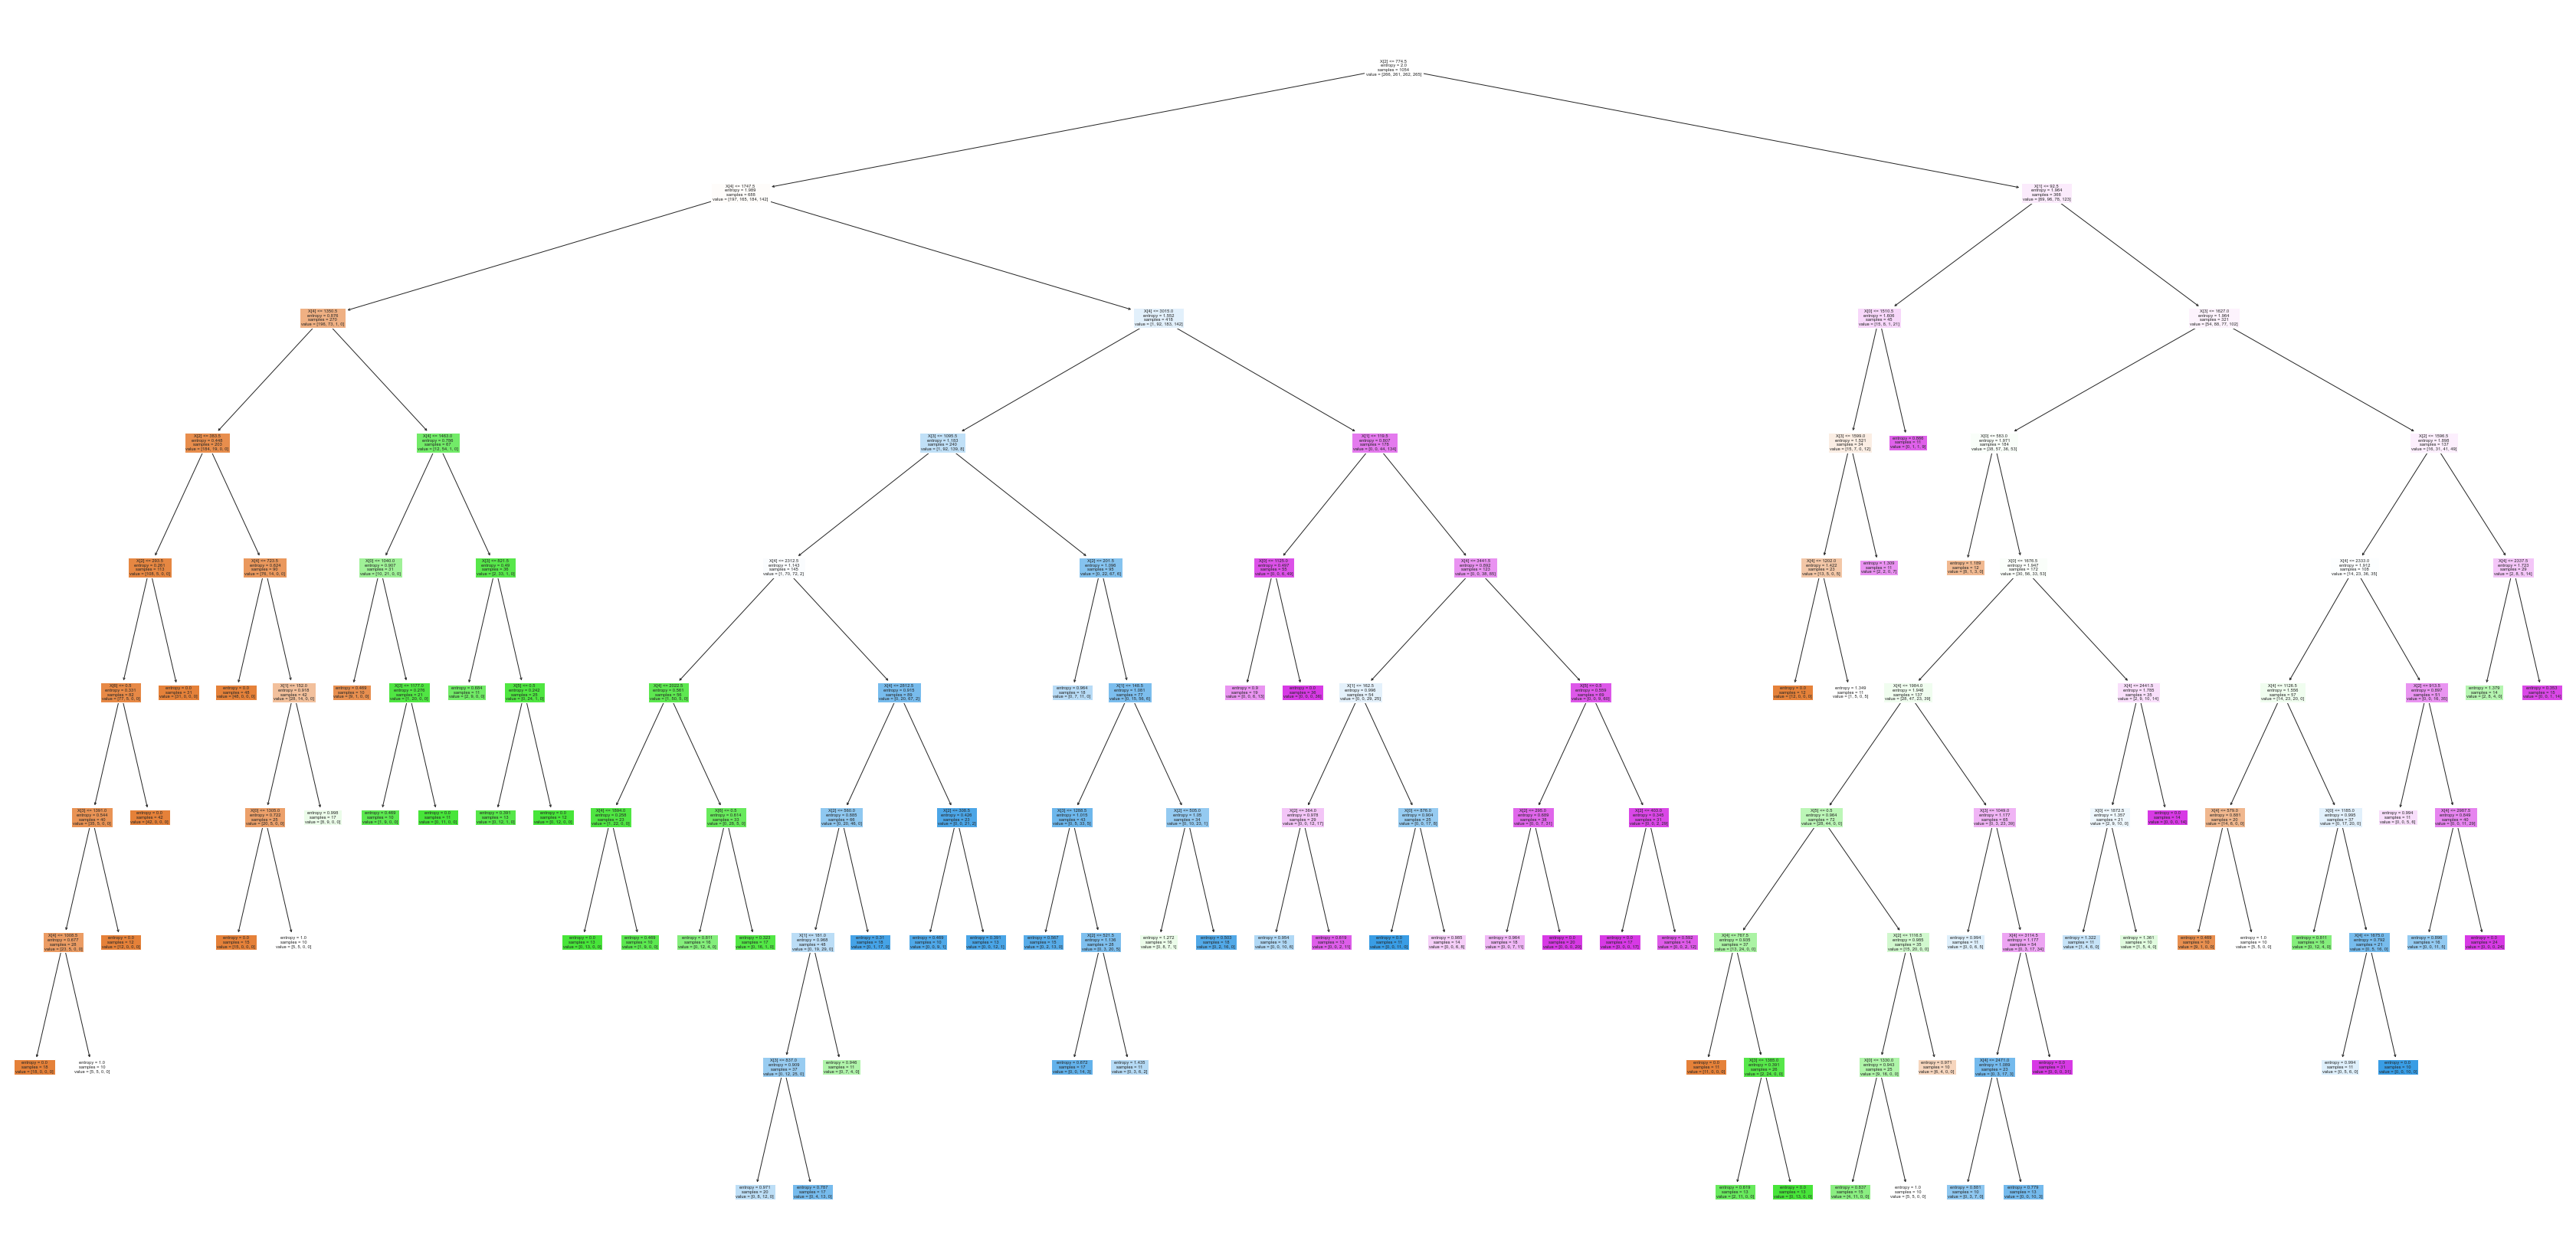

In [62]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(decision_tree, filled=True);

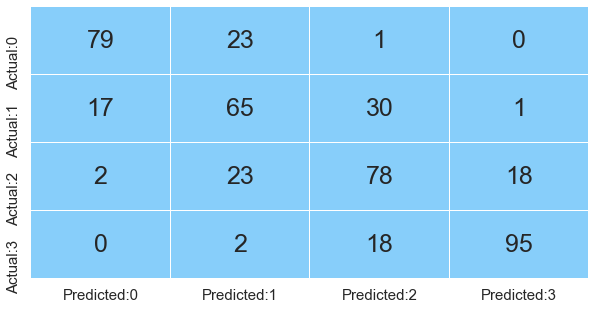

In [63]:
plot_confusion_matrix(decision_tree)

In [64]:
train_report = get_train_report(decision_tree)
print(train_report)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       266
           1       0.77      0.74      0.75       261
           2       0.75      0.76      0.76       262
           3       0.87      0.88      0.87       265

    accuracy                           0.82      1054
   macro avg       0.82      0.82      0.82      1054
weighted avg       0.82      0.82      0.82      1054



In [65]:
test_report = get_test_report(decision_tree)
print(test_report)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       103
           1       0.58      0.58      0.58       113
           2       0.61      0.64      0.63       121
           3       0.83      0.83      0.83       115

    accuracy                           0.70       452
   macro avg       0.71      0.70      0.71       452
weighted avg       0.70      0.70      0.70       452



- > **Accuracy of Decision tree is 79%.**

In [66]:
y_pred = decision_tree.predict(X_test)
dt_model = pd.Series({
                     'Model_Name': "Decision_Tree_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(dt_model, ignore_index=True)

# Random Forest

In [67]:
tuned_paramaters = [{'criterion': ['entropy', 'gini'],
                     'n_estimators': [10, 30, 50, 70, 90],
                     'max_depth': [10, 15, 20],
                     'max_features': ['sqrt', 'log2'],
                     'min_samples_split': [2, 5, 8, 11],
                     'min_samples_leaf': [25,50,75,100],
                     'max_leaf_nodes': [2, 5, 8, 11]}]
random_forest_classification = RandomForestClassifier(random_state = 10)
rf_grid = GridSearchCV(estimator = random_forest_classification, 
                       param_grid = tuned_paramaters, cv = 5)
rf_grid_model = rf_grid.fit(X_train, y_train)
print('Best parameters for random forest classifier: ', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier:  {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'max_leaf_nodes': 11, 'min_samples_leaf': 25, 'min_samples_split': 2, 'n_estimators': 90} 



In [68]:
rf_classification =RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                  n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                  max_depth = rf_grid_model.best_params_.get('max_depth'),
                                  max_features = rf_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# rf_classification =RandomForestClassifier(criterion = 'entropy', 
#                                     n_estimators = 70,
#                                     max_depth = 10,
#                                     max_features = 'sqrt',
#                                     max_leaf_nodes = 11,
#                                     min_samples_leaf = 1,
#                                     min_samples_split = 8,
#                                     random_state = 10)
rf_model = rf_classification.fit(X_train, y_train)

In [69]:
train_report = get_train_report(rf_model)
print(train_report) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       266
           1       0.79      0.80      0.79       261
           2       0.86      0.76      0.81       262
           3       0.95      0.97      0.96       265

    accuracy                           0.88      1054
   macro avg       0.88      0.88      0.87      1054
weighted avg       0.88      0.88      0.87      1054



In [70]:
test_report = get_test_report(rf_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       103
           1       0.66      0.71      0.68       113
           2       0.80      0.67      0.73       121
           3       0.93      0.93      0.93       115

    accuracy                           0.80       452
   macro avg       0.80      0.81      0.80       452
weighted avg       0.80      0.80      0.80       452



- >**Accuracy of Random forest is 80%.**

In [71]:
y_pred = rf_model.predict(X_test)
rafo_model = pd.Series({
                     'Model_Name': "Random_Forest_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(rafo_model, ignore_index=True)

# Ada Boost

In [72]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4,0.5,0.6],
                     'n_estimators':[5,10,15,20,25,30]}
ada_model = AdaBoostClassifier()
ada_grid = GridSearchCV(estimator = ada_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy')
ada_grid.fit(X_train, y_train)
print('Best parameters for AdaBoost classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost classifier:  {'learning_rate': 0.6, 'n_estimators': 5} 



In [73]:
ada_model = AdaBoostClassifier(n_estimators =ada_grid.best_params_.get('n_estimators'),
                          learning_rate= ada_grid.best_params_.get('learning_rate'), random_state = 10)
# ada_model = AdaBoostClassifier(n_estimators =5,
#                           learning_rate= 0.1, random_state = 10)
ada_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.6, n_estimators=5, random_state=10)

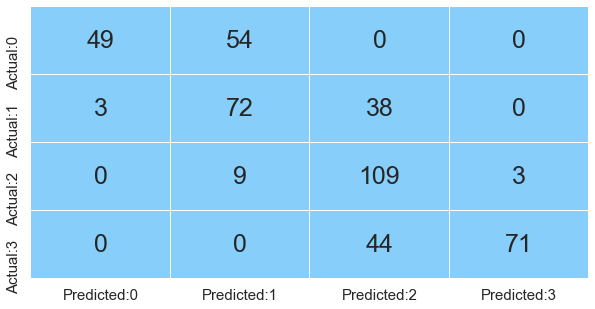

In [74]:
plot_confusion_matrix(ada_model)

In [75]:
test_report = get_test_report(ada_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.94      0.48      0.63       103
           1       0.53      0.64      0.58       113
           2       0.57      0.90      0.70       121
           3       0.96      0.62      0.75       115

    accuracy                           0.67       452
   macro avg       0.75      0.66      0.67       452
weighted avg       0.74      0.67      0.67       452



- >**Accuracy of Ada Boost is 67%.**

In [76]:
y_pred = ada_model.predict(X_test)
ab_model = pd.Series({
                     'Model_Name': "AdaBoost_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(ab_model, ignore_index=True)
score_card

,Model_Name,Accuracy
0,Logistic_Regression_model,0.960200
1,knn_model,0.834100
2,Gaussian_Naive_Bayes_model,0.754400
3,Decision_Tree_model,0.701300
4,Random_Forest_model,0.800900
5,AdaBoost_model,0.665900


# Gradient Boosting 

In [77]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                     'n_estimators':[5,10,15,20,25,30],
                     'max_depth': range(3,10)}
gb_model = GradientBoostingClassifier(verbose=0)
gb_grid = GridSearchCV(estimator = gb_model, param_grid = tuning_parameters, cv = 3, scoring = 'accuracy')
gb_grid.fit(X_train, y_train)
print('Best parameters for Gradient Boost classifier: ', gb_grid.best_params_, '\n')

Best parameters for Gradient Boost classifier:  {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 30} 



In [78]:
gboost_model = GradientBoostingClassifier(learning_rate=gb_grid.best_params_.get('learning_rate'),
                                          n_estimators = gb_grid.best_params_.get('n_estimators'),
                                          max_depth = gb_grid.best_params_.get('max_depth'), random_state = 10)
# gboost_model = GradientBoostingClassifier(learning_rate=0.1,
#                                           n_estimators = 5,
#                                           max_depth = 3, random_state = 10)
gboost_model.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=30,
                           random_state=10)

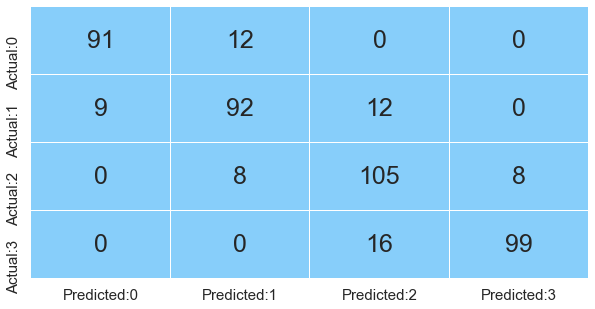

In [79]:
plot_confusion_matrix(gboost_model)

In [80]:
test_report = get_test_report(gboost_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       103
           1       0.82      0.81      0.82       113
           2       0.79      0.87      0.83       121
           3       0.93      0.86      0.89       115

    accuracy                           0.86       452
   macro avg       0.86      0.86      0.86       452
weighted avg       0.86      0.86      0.86       452



- >**Accuracy of Gradient Boost is 89%.**

In [81]:
y_pred = gboost_model.predict(X_test)
gb_model = pd.Series({
                     'Model_Name': "Gradient_Boost_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(gb_model, ignore_index=True)

# Extreme Gradient Boost

In [96]:
tuning_parameters = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5],
                     'max_depth': range(3,10),
                     'gamma': [0, 1, 2, 3, 4]}
xgb_model = XGBClassifier()
xgb_grid = GridSearchCV(estimator = xgb_model, param_grid = tuning_parameters, cv = 4, scoring = 'accuracy',verbose=0)
xgb_grid.fit(X_train, y_train)
print('Best parameters for XGBoost classifier: ', xgb_grid.best_params_, '\n')

Best parameters for XGBoost classifier:  {'gamma': 0, 'learning_rate': 0.5, 'max_depth': 7} 



In [83]:
xgb_model = XGBClassifier(learning_rate = xgb_grid.best_params_.get('learning_rate'),
                               max_depth = xgb_grid.best_params_.get('max_depth'),
                              gamma = xgb_grid.best_params_.get('gamma'),verbosity=0)
# xgb_model = XGBClassifier(learning_rate = 0.1,
#                                max_depth = 3,
#                               gamma = 0,verbosity=0)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)

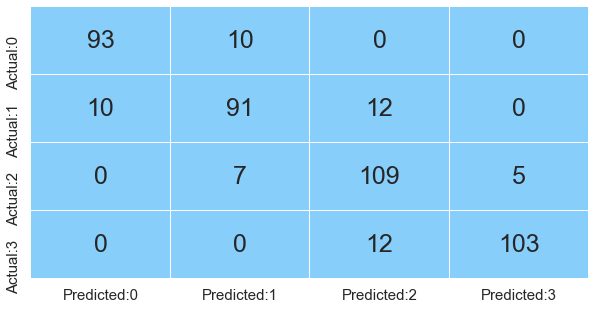

In [84]:
plot_confusion_matrix(xgb_model)

In [85]:
test_report = get_test_report(xgb_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       103
           1       0.84      0.81      0.82       113
           2       0.82      0.90      0.86       121
           3       0.95      0.90      0.92       115

    accuracy                           0.88       452
   macro avg       0.88      0.88      0.88       452
weighted avg       0.88      0.88      0.88       452



- >**Accuracy of XGB Boost is 88%.**

In [86]:
y_pred = xgb_model.predict(X_test)
xgboost_model = pd.Series({
                     'Model_Name': "Extreme_Gradient_Boost_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(xgboost_model, ignore_index=True)

# Identify the Important Features using XGBoost

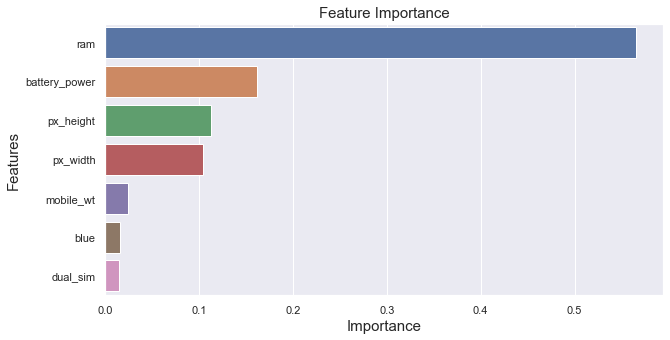

In [87]:
important_features = pd.DataFrame({'Features': X_train.columns, 
                                   'Importance': xgb_model.feature_importances_})
important_features = important_features.sort_values('Importance', ascending = False)
sns.barplot(x = 'Importance', y = 'Features', data = important_features)
plt.title('Feature Importance', fontsize = 15)
plt.xlabel('Importance', fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.show()

- >**From the above grapth it is clear that ram is the most influential feature on price followed by battery power and pixel resolution.**

# Stacking

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, df_target, random_state = 10, test_size = 0.3)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (1054, 7)
y_train (1054,)
X_test (452, 7)
y_test (452,)


In [89]:
base_learners = [('rf_model', RandomForestClassifier(criterion = 'entropy', 
                                  n_estimators = 90,
                                  max_depth = 10,
                                  max_features = 'sqrt',
                                  max_leaf_nodes = 11,
                                  min_samples_leaf = 25,
                                  min_samples_split = 8,
                                  random_state = 10)),
                 ('KNN_model', KNeighborsClassifier(metric= 'manhattan',
                                          n_neighbors = 17)),
                 ('NB_model', GaussianNB())]

stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier(learning_rate=0.5,
                                          n_estimators = 25,
                                          max_depth = 6, random_state = 10))
stack_model.fit(X_train, y_train)

StackingClassifier(estimators=[('rf_model',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=10,
                                                       max_features='sqrt',
                                                       max_leaf_nodes=11,
                                                       min_samples_leaf=25,
                                                       min_samples_split=8,
                                                       n_estimators=90,
                                                       random_state=10)),
                               ('KNN_model',
                                KNeighborsClassifier(metric='manhattan',
                                                     n_neighbors=17)),
                               ('NB_model', GaussianNB())],
                   final_estimator=GradientBoostingClassifier(learning_rate=0.5,
                                 

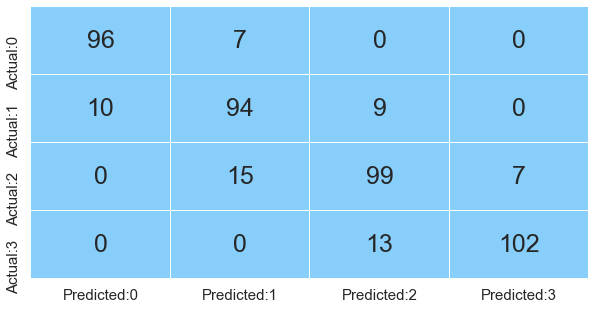

In [90]:
plot_confusion_matrix(stack_model)

In [91]:
test_report = get_test_report(stack_model)
print(test_report)

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       103
           1       0.81      0.83      0.82       113
           2       0.82      0.82      0.82       121
           3       0.94      0.89      0.91       115

    accuracy                           0.87       452
   macro avg       0.87      0.87      0.87       452
weighted avg       0.87      0.87      0.87       452



- >**Accuracy of Stack model is 87%.**

In [92]:
y_pred = stack_model.predict(X_test)
st_model = pd.Series({
                     'Model_Name': "Stack_model",
                     'Accuracy':round(accuracy_score(y_test, y_pred),4)
                   })
score_card = score_card.append(st_model, ignore_index=True)

# Comparing and selecting the best model

In [93]:
score_card

,Model_Name,Accuracy
0,Logistic_Regression_model,0.960200
1,knn_model,0.834100
2,Gaussian_Naive_Bayes_model,0.754400
3,Decision_Tree_model,0.701300
4,Random_Forest_model,0.800900
5,AdaBoost_model,0.665900
6,Gradient_Boost_model,0.856200
7,Extreme_Gradient_Boost_model,0.876100
8,Stack_model,0.865000


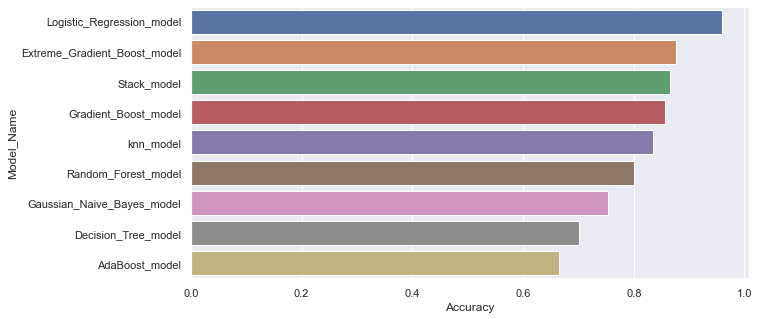

In [94]:
sns.barplot(y='Model_Name', x='Accuracy', data=score_card.sort_values(by = 'Accuracy',ascending=False))
plt.show()

# INSIGHTS

•	Accuracy score was used for model comparison as AUC score was not suitable for  multiclass dataset

•	Logistic Regression gave highest accuracy out of all models and hence can be considered as the best model for evaluation

•  In order to get best results I had performed RFE for feature selection and GridSearchCV & RandomisedSearchCV for tuning to get best hyperparameters leading to better results.